In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [201]:
data = pd.read_csv('D:\Earth.Org\TemperatureChange_Cities\daily_temperature_1000_cities_1980_2020.csv', skiprows=12)
key = pd.read_csv('D:\Earth.Org\TemperatureChange_Cities\daily_temperature_1000_cities_1980_2020.csv', nrows=7)
key = key.set_index('Key', drop=True)
key = key.T

In [202]:
data

,datetime,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,1980-01-01,4.16,1.48,11.35,23.40,17.86,13.74,9.10,20.47,14.24,...,22.14,11.54,0.67,24.05,21.21,3.71,-13.88,11.68,17.67,-0.82
1,1980-01-02,4.06,1.00,10.01,22.67,18.65,12.85,6.40,19.37,13.77,...,22.26,11.13,-0.88,24.19,23.29,3.26,-15.05,13.71,17.70,-5.25
2,1980-01-03,7.12,-3.23,9.67,22.30,18.42,10.50,5.43,18.71,12.08,...,21.09,10.28,-4.30,24.39,24.04,2.17,-14.19,13.00,11.19,-13.00
3,1980-01-04,9.23,-1.81,10.12,23.40,19.21,10.87,2.29,18.76,11.19,...,20.39,10.98,-6.75,24.12,21.49,-0.95,-15.09,12.67,14.22,-11.75
4,1980-01-05,3.20,-4.31,10.81,23.98,21.34,11.03,2.40,18.62,12.78,...,19.51,11.27,0.10,23.86,21.20,-0.66,-13.85,10.09,18.30,-2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14879,2020-09-26,19.72,20.83,15.86,27.69,25.29,28.99,22.92,28.75,22.30,...,28.99,28.53,8.67,29.49,29.00,21.73,5.72,25.77,29.09,14.24
14880,2020-09-27,20.65,22.14,16.93,26.55,23.83,28.93,23.08,29.71,23.34,...,28.85,29.52,9.55,29.64,28.89,21.60,4.30,26.32,28.39,15.58
14881,2020-09-28,21.68,21.12,13.58,26.99,20.90,29.25,22.78,29.96,25.33,...,29.11,30.11,11.74,30.09,27.86,22.72,5.60,26.59,24.75,14.36
14882,2020-09-29,18.89,19.82,11.50,27.10,24.79,28.68,22.43,29.85,27.61,...,28.94,29.61,12.73,29.10,26.92,21.54,5.74,26.82,21.55,12.49


In [203]:
key

Key,city,city_ascii,lat,lng,country,iso2,iso3
0,Tokyo,Tokyo,35.685,139.7514,Japan,JP,JPN
1,New York,New York,40.6943,-73.9249,United States,US,USA
2,Mexico City,Mexico City,19.4424,-99.131,Mexico,MX,MEX
3,Mumbai,Mumbai,19.017,72.857,India,IN,IND
4,São Paulo,Sao Paulo,-23.5587,-46.625,Brazil,BR,BRA
...,...,...,...,...,...,...,...
995,Yangzhou,Yangzhou,32.4,119.43,China,CN,CHN
996,Novokuznetsk,Novokuznetsk,53.75,87.115,Russia,RU,RUS
997,Latakia,Latakia,35.54,35.78,Syria,SY,SYR
998,Heroica Matamoros,Heroica Matamoros,25.88,-97.5,Mexico,MX,MEX


In [204]:
li = []
country = []
iso3 = []
for i in range(0,1000):
    data = data.rename(columns={f'{i}': key.iloc[i,1]})
    li.append(key.iloc[i,5])
    country.append(key.iloc[i,4])
    iso3.append(key.iloc[i,6])

In [205]:
# data['country'] = country
# data['iso3'] = iso3
# data

ValueError: Length of values (1000) does not match length of index (14884)

In [206]:
years = pd.to_datetime(data['datetime'])
# data['datetime'] = years.apply(lambda x: x.year)
# data = data.set_index('datetime')
years = years.apply(lambda x: x.year)
data['Years'] = years
years = list(set(years))
years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [207]:
key[key['country'] == 'Europe']

Key,city,city_ascii,lat,lng,country,iso2,iso3


In [208]:
df = pd.DataFrame()
df['year'] = years
i = 0
for c in key.values:
    i += 1
    li = []
    for y in years:
        temp = data[data['Years'] == y]
        li.append(temp[f'{c[1]}'].sum() / len(temp))
    print(li)
print(i)

[14.685792349726777, 14.38046575342466, 15.323150684931507, 15.024575342465752, 14.168196721311475, 15.139260273972603, 14.543095890410958, 15.545890410958904, 14.870901639344263, 15.737917808219178, 16.45027397260274, 15.836630136986303, 15.509262295081966, 15.028082191780822, 16.15175342465753, 15.743726027397264, 15.074098360655737, 15.866931506849316, 16.076767123287667, 16.329150684931506, 15.89325136612022, 15.709369863013698, 15.987068493150687, 15.425123287671234, 16.707868852459015, 15.554986301369862, 15.784191780821917, 16.070301369863014, 15.914125683060108, 16.009260273972604, 16.234383561643835, 15.814657534246576, 15.534890710382514, 16.214767123287672, 15.842438356164383, 16.337835616438355, 16.46275956284153, 15.933890410958906, 16.857232876712327, 16.586054794520546, 17.846204379562046]
[11.573579234972678, 11.700493150684933, 11.63421917808219, 12.438794520547944, 12.038387978142074, 12.218191780821916, 12.053835616438356, 12.007972602739725, 11.621256830601093, 11.6

In [209]:
import geopandas as gpd

world = gpd.read_file('D:\\Earth.Org\\TemperatureChange_Cities\\ne_50m_admin_0_countries\\ne_50m_admin_0_countries.shp')

ERROR:fiona._env:PROJ: proj_create_from_database: Cannot find proj.db
ERROR:fiona._env:PROJ: proj_create_from_wkt: Cannot find proj.db
ERROR:fiona._env:PROJ: proj_identify: Cannot find proj.db
ERROR:fiona._env:PROJ: proj_as_wkt: Cannot find proj.db


In [210]:
li = []
for c in key.values:
    if c[6] in world['ISO_A3'].values:
        temp = world[world['ISO_A3'] == c[6]]['CONTINENT'].values
        li.append(temp[0])
    else:
        li.append(None)
key['Continent'] = li
key

Key,city,city_ascii,lat,lng,country,iso2,iso3,Continent
0,Tokyo,Tokyo,35.685,139.7514,Japan,JP,JPN,Asia
1,New York,New York,40.6943,-73.9249,United States,US,USA,North America
2,Mexico City,Mexico City,19.4424,-99.131,Mexico,MX,MEX,North America
3,Mumbai,Mumbai,19.017,72.857,India,IN,IND,Asia
4,São Paulo,Sao Paulo,-23.5587,-46.625,Brazil,BR,BRA,South America
...,...,...,...,...,...,...,...,...
995,Yangzhou,Yangzhou,32.4,119.43,China,CN,CHN,Asia
996,Novokuznetsk,Novokuznetsk,53.75,87.115,Russia,RU,RUS,Europe
997,Latakia,Latakia,35.54,35.78,Syria,SY,SYR,Asia
998,Heroica Matamoros,Heroica Matamoros,25.88,-97.5,Mexico,MX,MEX,North America


In [211]:
key_eu = pd.DataFrame()
key_eu = key[key['Continent'] == 'Europe']
key_eu

Key,city,city_ascii,lat,lng,country,iso2,iso3,Continent
17,Moscow,Moscow,55.7522,37.6155,Russia,RU,RUS,Europe
25,London,London,51.5,-0.1167,United Kingdom,GB,GBR,Europe
46,Madrid,Madrid,40.4,-3.6834,Spain,ES,ESP,Europe
56,Barcelona,Barcelona,41.3833,2.1834,Spain,ES,ESP,Europe
63,Saint Petersburg,Saint Petersburg,59.939,30.316,Russia,RU,RUS,Europe
...,...,...,...,...,...,...,...,...
982,Orenburg,Orenburg,51.78,55.11,Russia,RU,RUS,Europe
983,Málaga,Malaga,36.7204,-4.42,Spain,ES,ESP,Europe
992,Leipzig,Leipzig,51.3354,12.41,Germany,DE,DEU,Europe
996,Novokuznetsk,Novokuznetsk,53.75,87.115,Russia,RU,RUS,Europe


In [212]:
cities = list(key_eu['city_ascii'])
data_eu = data[['Years']+cities]

In [213]:
df = pd.DataFrame()
df['year'] = years
i = 0
for c in key_eu['city_ascii']:
    i += 1
    li = []
    for y in years:
        temp = data_eu.loc[ data_eu['Years'] == y, f'{c}']
        li.append(temp.sum() / len(temp))
    df[f'{c}'] = li
print(i)
df

138


,year,Moscow,London,Madrid,Barcelona,Saint Petersburg,Berlin,Rome,Athens,Milan,...,Vladivostok,Irkutsk,Khabarovsk,Makhachkala,Bristol,Orenburg,Malaga,Leipzig,Novokuznetsk,Goteborg
0,1980,3.468579,9.561448,14.128115,Barcelona 14.711967 Barcelona 26.362623 ...,3.423197,7.848852,14.255710,17.044645,12.425000,...,4.700874,-0.765191,1.070601,11.623798,9.600082,3.941749,16.344617,8.149645,1.403115,6.435902
1,1981,6.057096,9.572438,14.670027,Barcelona 15.427041 Barcelona 26.286630 ...,4.234658,8.865808,14.688329,17.519945,12.561452,...,5.039534,-0.207425,0.733973,12.625288,9.563863,5.977068,16.578110,8.946795,1.932110,6.406658
2,1982,4.849534,10.256411,14.696274,Barcelona 15.762000 Barcelona 25.937671 ...,4.233863,9.615233,15.589671,17.051699,13.124493,...,5.630548,0.139726,1.980110,11.151890,10.298000,5.274986,16.445890,10.012082,2.890575,7.392493
3,1983,5.753288,10.419068,14.643890,Barcelona 15.625342 Barcelona 26.437945 ...,5.156767,9.850274,15.120712,16.807562,13.041068,...,5.161068,0.525260,1.386301,11.868575,10.410603,6.258932,16.901589,9.931068,3.245781,7.912630
4,1984,4.543607,10.029809,13.670000,Barcelona 14.778142 Barcelona 25.805656 ...,4.824617,8.577623,14.489344,17.184044,12.139836,...,4.680519,-1.440301,1.320164,11.363087,10.204454,4.417923,16.000956,8.628989,-0.258470,7.622568
5,1985,3.474082,9.227753,14.860027,Barcelona 15.198603 Barcelona 25.543699 ...,2.532603,8.147123,15.333479,17.483562,12.566329,...,5.016164,-0.998767,1.663178,11.338603,9.165342,4.425123,16.693973,8.221836,0.913479,5.390411
6,1986,4.284274,9.171836,14.342493,Barcelona 15.435315 Barcelona 25.637616 ...,3.821562,8.452110,15.284384,17.574192,12.712411,...,4.493671,0.408712,1.605205,11.845041,8.976849,4.024548,16.430767,8.623699,1.340877,6.104904
7,1987,2.557781,9.475370,14.965068,Barcelona 15.560411 Barcelona 26.601370 ...,2.146110,7.650000,15.514384,17.173342,12.662192,...,4.692740,-0.520904,0.747370,11.127973,9.511096,3.247836,16.900411,7.844795,1.334137,5.296384
8,1988,5.083880,10.091612,14.304863,Barcelona 15.740464 Barcelona 26.172077 ...,4.785956,9.646120,15.579754,17.491175,13.218934,...,5.448033,0.285273,2.333251,11.770082,10.061311,4.882131,16.770820,9.852186,1.940191,7.634454
9,1989,6.814055,11.046411,15.439671,Barcelona 16.072384 Barcelona 25.612192 ...,6.439534,10.357397,15.163890,17.116986,13.089973,...,6.166466,0.670082,3.122822,12.052356,10.993151,5.685397,17.242000,10.341151,2.861699,8.661945


In [214]:
df['Barcelona'] = df['Barcelona'].apply(lambda x: x[0])

In [215]:
df

,year,Moscow,London,Madrid,Barcelona,Saint Petersburg,Berlin,Rome,Athens,Milan,...,Vladivostok,Irkutsk,Khabarovsk,Makhachkala,Bristol,Orenburg,Malaga,Leipzig,Novokuznetsk,Goteborg
0,1980,3.468579,9.561448,14.128115,14.711967,3.423197,7.848852,14.255710,17.044645,12.425000,...,4.700874,-0.765191,1.070601,11.623798,9.600082,3.941749,16.344617,8.149645,1.403115,6.435902
1,1981,6.057096,9.572438,14.670027,15.427041,4.234658,8.865808,14.688329,17.519945,12.561452,...,5.039534,-0.207425,0.733973,12.625288,9.563863,5.977068,16.578110,8.946795,1.932110,6.406658
2,1982,4.849534,10.256411,14.696274,15.762000,4.233863,9.615233,15.589671,17.051699,13.124493,...,5.630548,0.139726,1.980110,11.151890,10.298000,5.274986,16.445890,10.012082,2.890575,7.392493
3,1983,5.753288,10.419068,14.643890,15.625342,5.156767,9.850274,15.120712,16.807562,13.041068,...,5.161068,0.525260,1.386301,11.868575,10.410603,6.258932,16.901589,9.931068,3.245781,7.912630
4,1984,4.543607,10.029809,13.670000,14.778142,4.824617,8.577623,14.489344,17.184044,12.139836,...,4.680519,-1.440301,1.320164,11.363087,10.204454,4.417923,16.000956,8.628989,-0.258470,7.622568
5,1985,3.474082,9.227753,14.860027,15.198603,2.532603,8.147123,15.333479,17.483562,12.566329,...,5.016164,-0.998767,1.663178,11.338603,9.165342,4.425123,16.693973,8.221836,0.913479,5.390411
6,1986,4.284274,9.171836,14.342493,15.435315,3.821562,8.452110,15.284384,17.574192,12.712411,...,4.493671,0.408712,1.605205,11.845041,8.976849,4.024548,16.430767,8.623699,1.340877,6.104904
7,1987,2.557781,9.475370,14.965068,15.560411,2.146110,7.650000,15.514384,17.173342,12.662192,...,4.692740,-0.520904,0.747370,11.127973,9.511096,3.247836,16.900411,7.844795,1.334137,5.296384
8,1988,5.083880,10.091612,14.304863,15.740464,4.785956,9.646120,15.579754,17.491175,13.218934,...,5.448033,0.285273,2.333251,11.770082,10.061311,4.882131,16.770820,9.852186,1.940191,7.634454
9,1989,6.814055,11.046411,15.439671,16.072384,6.439534,10.357397,15.163890,17.116986,13.089973,...,6.166466,0.670082,3.122822,12.052356,10.993151,5.685397,17.242000,10.341151,2.861699,8.661945


In [216]:
df_eu = df
df_eu = df_eu.set_index('year')
df_eu

,Moscow,London,Madrid,Barcelona,Saint Petersburg,Berlin,Rome,Athens,Milan,Stuttgart,...,Vladivostok,Irkutsk,Khabarovsk,Makhachkala,Bristol,Orenburg,Malaga,Leipzig,Novokuznetsk,Goteborg
year,,,,,,,,,,,,,,,,,,,,,
1980,3.468579,9.561448,14.128115,14.711967,3.423197,7.848852,14.255710,17.044645,12.425000,8.387350,...,4.700874,-0.765191,1.070601,11.623798,9.600082,3.941749,16.344617,8.149645,1.403115,6.435902
1981,6.057096,9.572438,14.670027,15.427041,4.234658,8.865808,14.688329,17.519945,12.561452,8.994219,...,5.039534,-0.207425,0.733973,12.625288,9.563863,5.977068,16.578110,8.946795,1.932110,6.406658
1982,4.849534,10.256411,14.696274,15.762000,4.233863,9.615233,15.589671,17.051699,13.124493,9.189616,...,5.630548,0.139726,1.980110,11.151890,10.298000,5.274986,16.445890,10.012082,2.890575,7.392493
1983,5.753288,10.419068,14.643890,15.625342,5.156767,9.850274,15.120712,16.807562,13.041068,9.411315,...,5.161068,0.525260,1.386301,11.868575,10.410603,6.258932,16.901589,9.931068,3.245781,7.912630
1984,4.543607,10.029809,13.670000,14.778142,4.824617,8.577623,14.489344,17.184044,12.139836,8.314098,...,4.680519,-1.440301,1.320164,11.363087,10.204454,4.417923,16.000956,8.628989,-0.258470,7.622568
1985,3.474082,9.227753,14.860027,15.198603,2.532603,8.147123,15.333479,17.483562,12.566329,8.224575,...,5.016164,-0.998767,1.663178,11.338603,9.165342,4.425123,16.693973,8.221836,0.913479,5.390411
1986,4.284274,9.171836,14.342493,15.435315,3.821562,8.452110,15.284384,17.574192,12.712411,8.541479,...,4.493671,0.408712,1.605205,11.845041,8.976849,4.024548,16.430767,8.623699,1.340877,6.104904
1987,2.557781,9.475370,14.965068,15.560411,2.146110,7.650000,15.514384,17.173342,12.662192,8.234986,...,4.692740,-0.520904,0.747370,11.127973,9.511096,3.247836,16.900411,7.844795,1.334137,5.296384
1988,5.083880,10.091612,14.304863,15.740464,4.785956,9.646120,15.579754,17.491175,13.218934,9.626448,...,5.448033,0.285273,2.333251,11.770082,10.061311,4.882131,16.770820,9.852186,1.940191,7.634454


In [217]:
df_eu['Birmingham'] = df_eu['Birmingham'].apply(lambda x: x[0])

In [218]:
df_eu['Valencia'] = df_eu['Valencia'].apply(lambda x: x[1])

In [219]:
key[key['city_ascii'] == 'Valencia']

Key,city,city_ascii,lat,lng,country,iso2,iso3,Continent
238,Valencia,Valencia,10.23,-67.98,Venezuela,VE,VEN,South America
750,Valencia,Valencia,39.485,-0.4,Spain,ES,ESP,Europe


In [220]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_eu_trend = pd.DataFrame(index=years,columns=cities)
temp = []
for c in cities:
    df_eu_trend[c] = seasonal_decompose(df_eu[f'{c}'],model='additive',extrapolate_trend='freq',freq=20).trend.values
df_eu_trend

<ipython-input-220-ee9941004e90>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  df_eu_trend[c] = seasonal_decompose(df_eu[f'{c}'],model='additive',extrapolate_trend='freq',freq=20).trend.values


,Moscow,London,Madrid,Barcelona,Saint Petersburg,Berlin,Rome,Athens,Milan,Stuttgart,...,Vladivostok,Irkutsk,Khabarovsk,Makhachkala,Bristol,Orenburg,Malaga,Leipzig,Novokuznetsk,Goteborg
1980,4.440901,9.952484,14.630470,15.367907,3.933001,8.867042,14.999672,16.917759,12.722239,8.917135,...,5.306997,0.292753,1.823341,10.915890,9.956778,4.243474,16.564784,8.992833,2.093531,7.103632
1981,4.492710,9.987247,14.648972,15.395386,3.983830,8.905051,15.038897,16.957284,12.778076,8.953640,...,5.335153,0.307870,1.840710,10.980430,9.982556,4.303769,16.585571,9.031236,2.106945,7.133211
1982,4.544519,10.022010,14.667474,15.422866,4.034660,8.943060,15.078122,16.996808,12.833912,8.990144,...,5.363308,0.322987,1.858079,11.044971,10.008335,4.364064,16.606359,9.069639,2.120359,7.162790
1983,4.596328,10.056774,14.685976,15.450346,4.085489,8.981069,15.117346,17.036332,12.889748,9.026649,...,5.391463,0.338104,1.875448,11.109511,10.034114,4.424359,16.627146,9.108042,2.133773,7.192369
1984,4.648137,10.091537,14.704477,15.477825,4.136319,9.019078,15.156571,17.075856,12.945585,9.063154,...,5.419618,0.353221,1.892817,11.174052,10.059893,4.484654,16.647934,9.146445,2.147187,7.221948
1985,4.699946,10.126300,14.722979,15.505305,4.187148,9.057087,15.195796,17.115380,13.001421,9.099658,...,5.447773,0.368338,1.910187,11.238592,10.085672,4.544949,16.668721,9.184848,2.160601,7.251527
1986,4.751756,10.161063,14.741481,15.532785,4.237978,9.095095,15.235020,17.154904,13.057257,9.136163,...,5.475929,0.383455,1.927556,11.303133,10.111450,4.605244,16.689509,9.223251,2.174014,7.281106
1987,4.803565,10.195827,14.759983,15.560264,4.288807,9.133104,15.274245,17.194429,13.113093,9.172667,...,5.504084,0.398572,1.944925,11.367673,10.137229,4.665539,16.710296,9.261654,2.187428,7.310685
1988,4.855374,10.230590,14.778484,15.587744,4.339637,9.171113,15.313470,17.233953,13.168930,9.209172,...,5.532239,0.413689,1.962294,11.432214,10.163008,4.725834,16.731084,9.300057,2.200842,7.340264
1989,4.907183,10.265353,14.796986,15.615224,4.390466,9.209122,15.352695,17.273477,13.224766,9.245677,...,5.560394,0.428806,1.979663,11.496754,10.188787,4.786129,16.751872,9.338460,2.214256,7.369843


<AxesSubplot:>

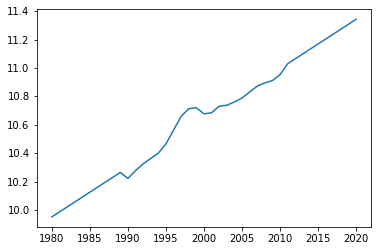

In [221]:
df_eu_trend['London'].plot()

In [222]:
line = df_eu_trend.values[0]
df_eu_trend = df_eu_trend - line

In [227]:
df_eu_trend = df_eu_trend.T
df_eu_trend['Lat'] = key_eu['lat'].values
df_eu_trend['Lon'] = key_eu['lng'].values
df_eu_trend

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,Lat,Lon
Moscow,0,0.0518091,0.103618,0.155427,0.207236,0.259045,0.310854,0.362663,0.414473,0.466282,...,1.7097,1.76151,1.81332,1.86513,1.91694,1.96874,2.02055,2.07236,55.7522,37.6155
London,0,0.0347632,0.0695265,0.10429,0.139053,0.173816,0.208579,0.243343,0.278106,0.312869,...,1.14719,1.18195,1.21671,1.25148,1.28624,1.321,1.35577,1.39053,51.5,-0.1167
Madrid,0,0.0185018,0.0370035,0.0555053,0.0740071,0.0925088,0.111011,0.129512,0.148014,0.166516,...,0.610558,0.62906,0.647562,0.666064,0.684565,0.703067,0.721569,0.740071,40.4,-3.6834
Barcelona,0,0.0274797,0.0549594,0.0824391,0.109919,0.137398,0.164878,0.192358,0.219837,0.247317,...,0.90683,0.934309,0.961789,0.989269,1.01675,1.04423,1.07171,1.09919,41.3833,2.1834
Saint Petersburg,0,0.0508295,0.101659,0.152489,0.203318,0.254148,0.304977,0.355807,0.406636,0.457466,...,1.67737,1.7282,1.77903,1.82986,1.88069,1.93152,1.98235,2.03318,59.939,30.316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Orenburg,0,0.060295,0.12059,0.180885,0.24118,0.301475,0.36177,0.422065,0.48236,0.542655,...,1.98973,2.05003,2.11032,2.17062,2.23091,2.29121,2.3515,2.4118,51.78,55.11
Malaga,0,0.0207876,0.0415751,0.0623627,0.0831502,0.103938,0.124725,0.145513,0.1663,0.187088,...,0.685989,0.706777,0.727565,0.748352,0.76914,0.789927,0.810715,0.831502,36.7204,-4.42
Leipzig,0,0.038403,0.0768059,0.115209,0.153612,0.192015,0.230418,0.268821,0.307224,0.345627,...,1.2673,1.3057,1.3441,1.38251,1.42091,1.45931,1.49772,1.53612,51.3354,12.41
Novokuznetsk,0,0.0134138,0.0268277,0.0402415,0.0536553,0.0670692,0.080483,0.0938969,0.107311,0.120725,...,0.442657,0.45607,0.469484,0.482898,0.496312,0.509726,0.52314,0.536553,53.75,87.115


In [245]:
df_eu_trend = df_eu_trend[['Lat']+['Lon']+list(df_eu_trend.columns[:-2])]

In [247]:
df_eu.to_csv('D:\Earth.Org\TemperatureChange_Cities\European_Cities_1980_to_2020.csv')
df_eu_trend.to_csv('D:\Earth.Org\TemperatureChange_Cities\European_Cities_1980_to_2020_trend.csv')